In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df['Conductivity'].isna().sum()

np.int64(0)

In [5]:
df=df.fillna(0)
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [6]:
df=df.fillna(df.mean())

In [7]:
df.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
X= df.drop('Potability', axis=1)
y= df['Potability']
print(X)
print(y)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
233,6.623614,203.030141,17167.301297,6.049601,311.726288,410.243247,15.914500,65.021229,2.915166
831,6.684700,193.840931,34157.184474,9.876574,344.535407,498.063996,8.818757,66.659352,4.030660
2658,6.836060,205.667718,18321.327502,6.712854,297.837188,494.484249,13.808923,70.714225,4.952508
2495,0.000000,183.488839,12675.938962,9.777807,319.870584,482.445026,13.309723,46.853410,3.240419
2603,6.406798,182.885137,17851.064021,7.462758,332.486731,398.779746,17.301617,64.070236,4.573968
...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
1130,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,0.000000,4.220028
1294,6.630364,186.761088,30939.023214,7.703481,0.000000,330.876083,13.815757,86.753117,3.490588
860,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [12]:
y_train

233     0
831     0
2658    0
2495    0
2603    0
       ..
1095    1
1130    1
1294    0
860     0
3174    1
Name: Potability, Length: 2620, dtype: int64

In [13]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,0.000000,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
2045,6.615350,179.240661,26392.863612,9.309160,0.000000,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
208,10.026159,224.266358,14962.177833,7.428313,336.972950,517.512842,18.858519,65.363452,4.182278
1578,6.865569,231.445054,22585.788809,5.676387,0.000000,496.603425,16.154964,91.461709,4.916218
565,7.459145,217.700130,19436.503542,4.639116,352.424439,494.094339,14.460295,57.196188,3.841052
313,5.862641,185.065220,44069.272158,4.382721,412.690111,331.570139,15.306079,59.605812,5.507421


In [14]:
y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
208     0
1578    1
565     0
313     1
601     0
Name: Potability, Length: 656, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

[0.37302877 0.42541333 0.38510993 0.38542059 0.41631456 0.40456215
 0.33683672 0.42028483 0.37861941 0.40981677 0.38751927 0.3780384
 0.3232618  0.35858302 0.4303658  0.44199473 0.36985548 0.42800241
 0.39153243 0.3953535  0.31878756 0.31975545 0.37125219 0.38159486
 0.39690548 0.39886707 0.33720826 0.39600059 0.42515603 0.37571073
 0.34878109 0.36872979 0.40785943 0.40462046 0.41665585 0.40578978
 0.39105664 0.39613773 0.39623098 0.41076376 0.38222868 0.43448692
 0.38935725 0.40662719 0.4102169  0.37784554 0.37523915 0.37891604
 0.40138842 0.42952422 0.35724934 0.39105161 0.36589871 0.42564328
 0.40090689 0.37128843 0.37790644 0.40694762 0.42579508 0.44942094
 0.37339101 0.38470797 0.40746419 0.41032152 0.38287118 0.41370322
 0.38605019 0.43306028 0.41040459 0.36539774 0.36832724 0.39406095
 0.38330336 0.41131463 0.39571291 0.36532782 0.40365902 0.37350624
 0.4042961  0.3652263  0.35346922 0.3483936  0.36855103 0.35465018
 0.40229396 0.34139499 0.42156666 0.36472294 0.3930269  0.39989

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_lr)
print("R-squared:", r2)

Mean Squared Error: 0.23393435236624116
R-squared: -0.0014162567630784384


In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print('Logistic regression accuracy', accuracy_score(y_test,y_pred)*100)

Logistic regression accuracy 62.80487804878049


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
print('KNeighbors classification accuracy',accuracy_score(y_test,y_pred)*100)

KNeighbors classification accuracy 54.420731707317074


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

63.41463414634146


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred= dtc.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred))

Accuracy 0.5929878048780488


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf)*100)

Random Forest Accuracy: 70.27439024390245


<Axes: xlabel='Potability'>

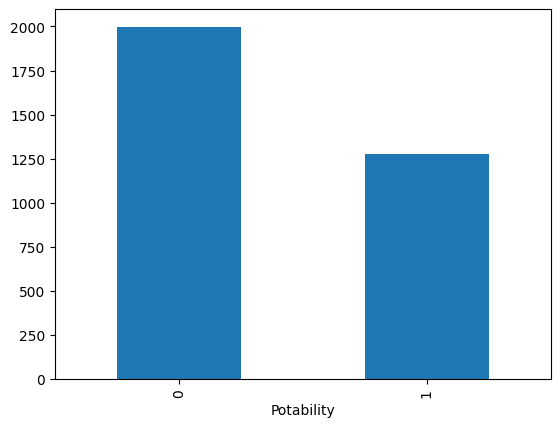

In [22]:
df.Potability.value_counts().plot(kind='bar')

In [23]:
df['ph'].value_counts().values

array([492,   1,   1, ...,   1,   1,   1])

<Axes: title={'center': 'Histogram'}, ylabel='Frequency'>

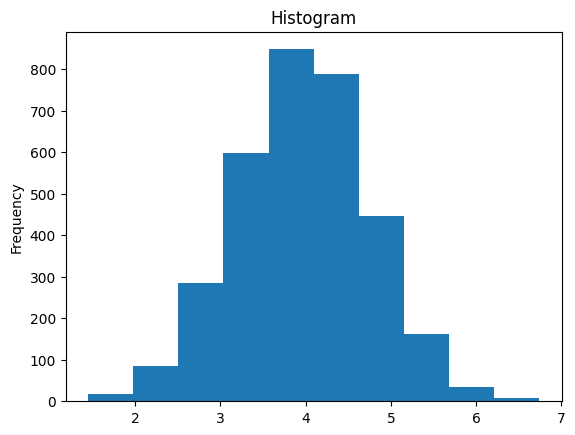

In [24]:
df['Turbidity'].plot(kind='hist', title='Histogram')

C:\Users\shamritha varathan\AppData\Local\Temp\ipykernel_19484\384993759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Potability']==0]['ph'],label='the water cannot be consumed')
C:\Users\shamritha varathan\AppData\Local\Temp\ipykernel_19484\384993759.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

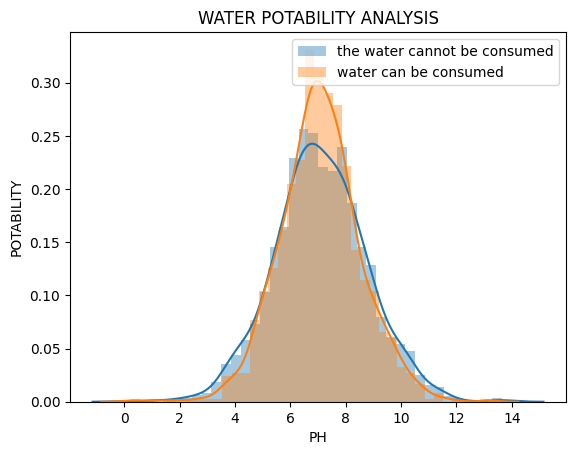

In [43]:
sns.distplot(df[df['Potability']==0]['ph'],label='the water cannot be consumed')
plt.title('WATER POTABILITY ANALYSIS')
sns.distplot(df[df['Potability']==1]['ph'],label='water can be consumed')
plt.xlabel('PH')
plt.ylabel('POTABILITY')
plt.legend()
plt.savefig('2.png')


Text(0, 0.5, 'HARDNESS')

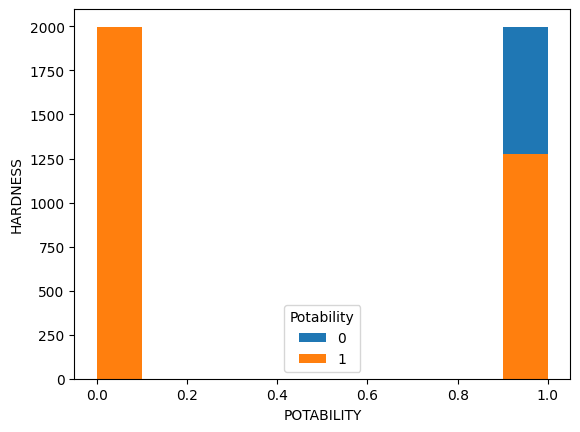

In [44]:
pd.crosstab(df.Hardness,df.Potability).plot(kind='hist')
plt.xlabel('POTABILITY')
plt.ylabel('HARDNESS')

In [41]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [42]:
df.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64